In [14]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg', 'retina'}

import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### example 1

In [23]:
np.random.seed(0)

# make sample
p = sm.tsa.ArmaProcess([1,-0.6], [1, 0.3])
y = p.generate_sample(100)

In [24]:
# arma(1,1) model
m = sm.tsa.ARMA(y, (1, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                -141.148
Method:                       css-mle   S.D. of innovations              0.987
Date:                Tue, 12 Jul 2016   AIC                            290.296
Time:                        22:48:29   BIC                            300.716
Sample:                             0   HQIC                           294.513
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2498      0.437      0.572      0.569        -0.606     1.106
ar.L1.y        0.7319      0.082      8.968      0.000         0.572     0.892
ma.L1.y        0.2176      0.115      1.891      0.0

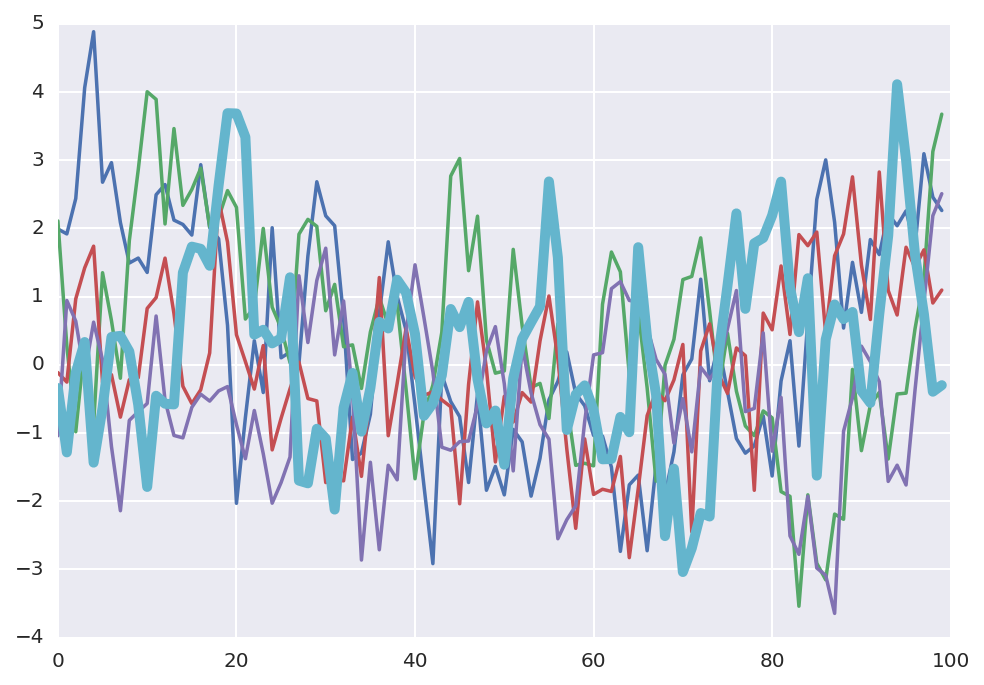

In [20]:
np.random.seed(0)
# const값 r.params[0]을 더해줌
# S.D. of innovations 시그마
p = sm.tsa.ArmaProcess(np.r_[1, -r.arparams], [1])
for i in range(5):
    y = p.generate_sample(len(y)) * np.sqrt(r.sigma2) + r.params[0] # 결과 값은 시그마 제곱과 const 값을 곱해줘야 한다.
    plt.plot(y)  
plt.plot(y, lw=5);

### example 2

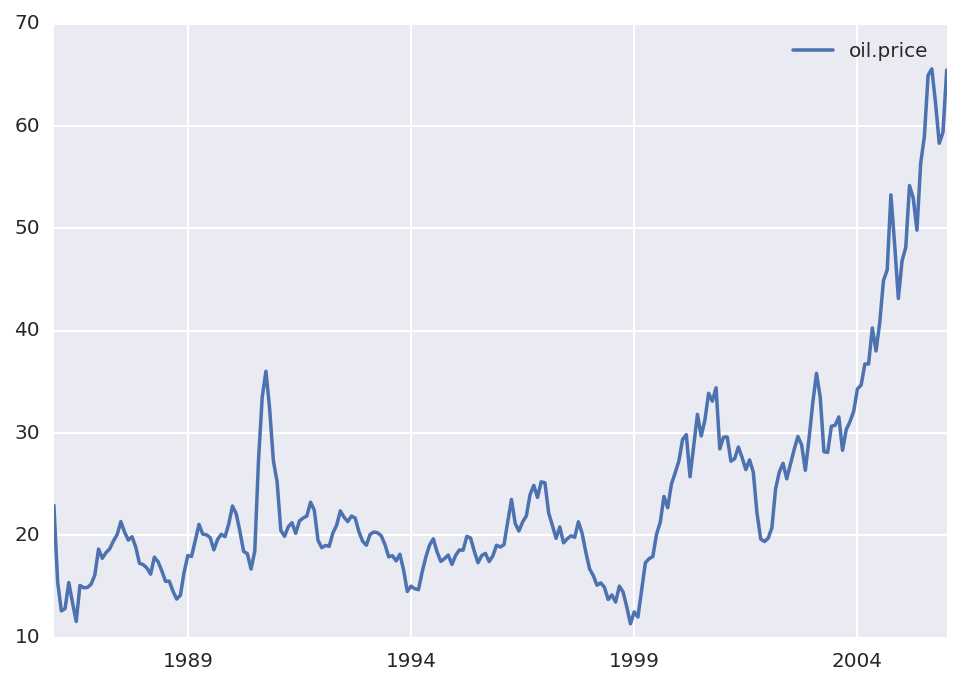

In [41]:
df = pd.read_csv("./oil.price.dat")
df.index = pd.date_range("01/1986", "01/2006", freq="MS") 
df.plot();

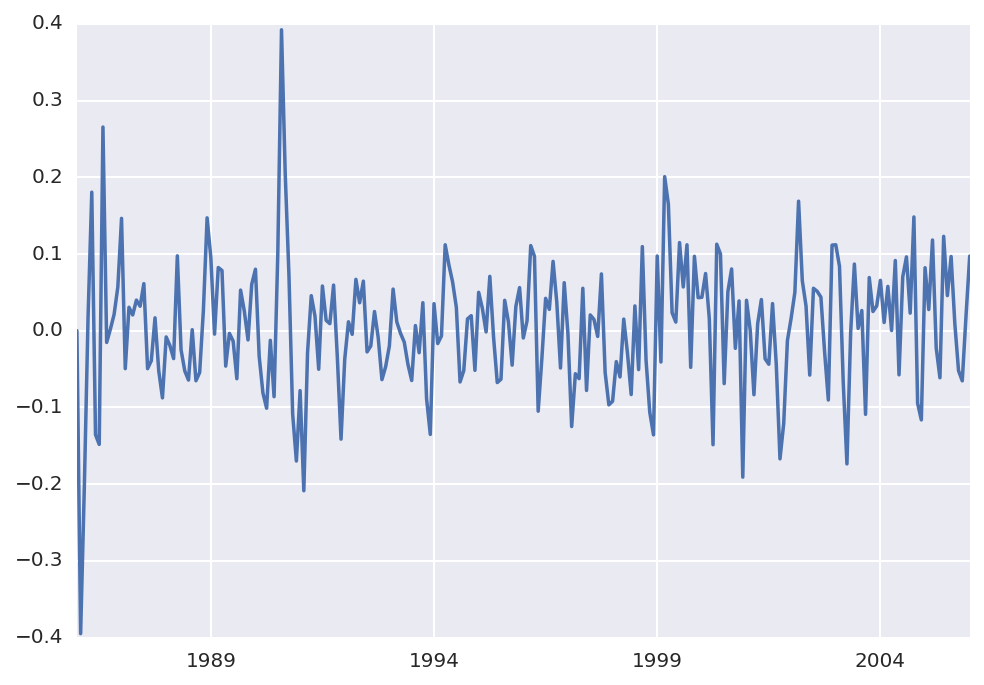

In [42]:
df["y"] = np.log(df["oil.price"]).diff() # log + diff 수익률과 같이 (이전 값과의 차이 값을 구해줌)
df.y.fillna(0, inplace=True)  # fill NaN
df.y.plot();

In [43]:
m = sm.tsa.ARMA(df.y.values, (1, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  241
Model:                     ARMA(1, 1)   Log Likelihood                 262.492
Method:                       css-mle   S.D. of innovations              0.081
Date:                Tue, 12 Jul 2016   AIC                           -516.983
Time:                        22:56:11   BIC                           -503.044
Sample:                             0   HQIC                          -511.367
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0045      0.006      0.729      0.467        -0.008     0.017
ar.L1.y       -0.3403      0.192     -1.776      0.077        -0.716     0.035
ma.L1.y        0.5941      0.165      3.605      0.0

### make samples

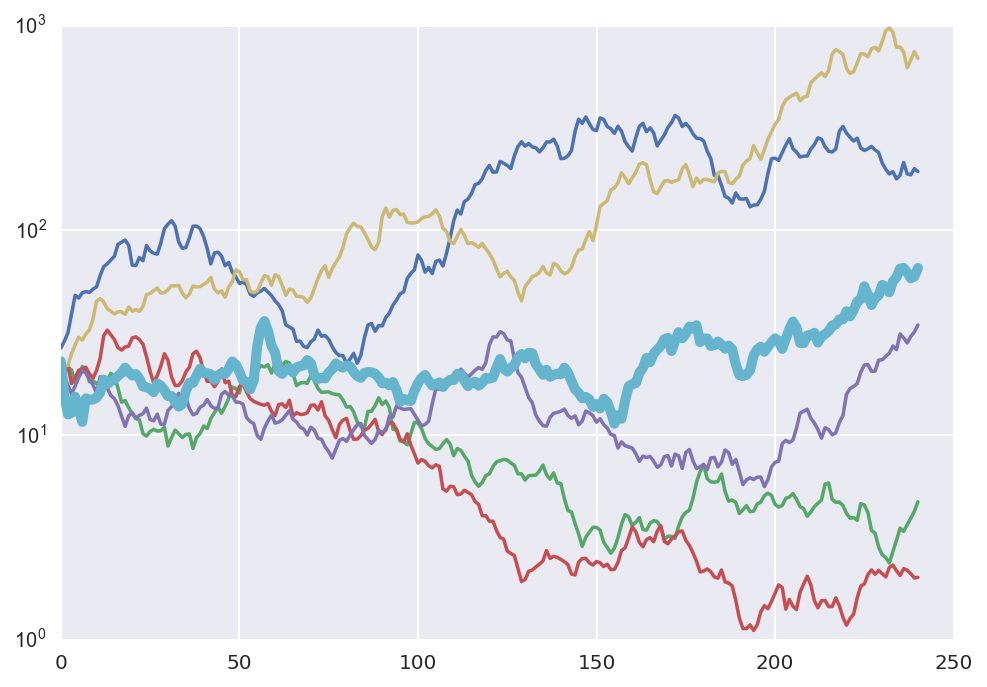

In [54]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1], np.r_[1, r.maparams])
for i in range(5):
    y = p.generate_sample(len(df)) * np.sqrt(r.sigma2) + r.params[0]
    z = np.exp(y.cumsum())*df['oil.price'].values[0]
    plt.plot(z)  
plt.semilogy(df['oil.price'].values, lw=5);

### predict

In [48]:
df["y"] = np.log(df["oil.price"])
df.tail()

,oil.price,y
2005-09-01,65.59,4.183423
2005-10-01,62.26,4.131319
2005-11-01,58.32,4.065945
2005-12-01,59.41,4.084463
2006-01-01,65.48,4.181745


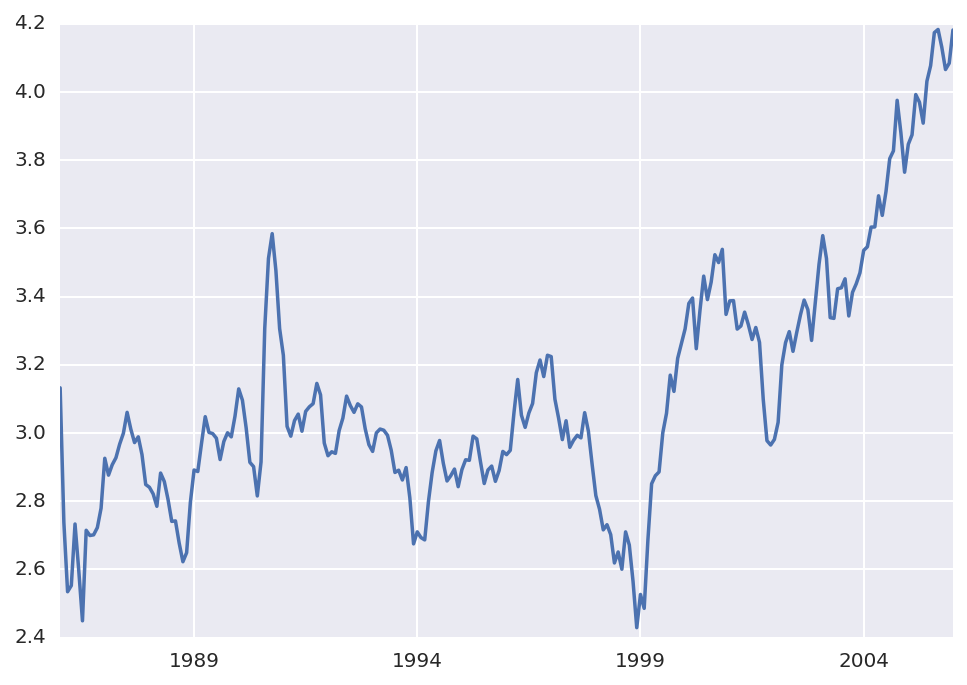

In [49]:
df.y.plot();

In [50]:
m = sm.tsa.ARIMA(df.y, [0,1,1])
r = m.fit()
print(r.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  240
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 260.468
Method:                       css-mle   S.D. of innovations              0.082
Date:                Tue, 12 Jul 2016   AIC                           -514.936
Time:                        22:57:13   BIC                           -504.494
Sample:                    02-01-1986   HQIC                          -510.729
                         - 01-01-2006                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0041      0.007      0.595      0.553        -0.009     0.017
ma.L1.D.y      0.2939      0.070      4.226      0.000         0.158     0.430
                                    Roots           

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


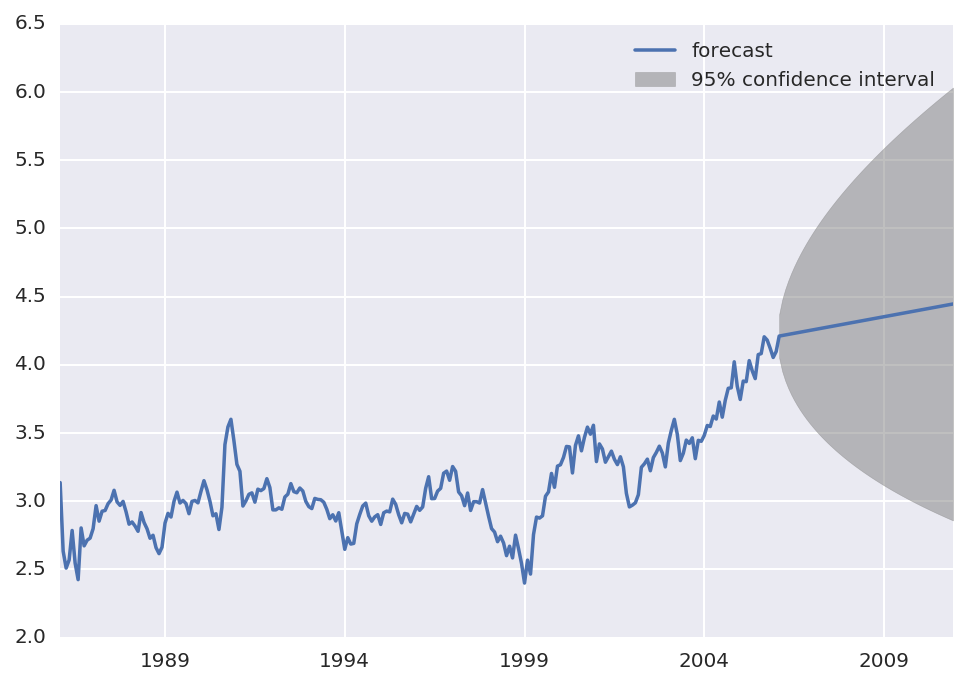

In [52]:
r.plot_predict(end="2010-12", plot_insample=False);